# Sales Exploratory analysis using pandas and numpy

## Done by Chukwuemeka @ linkedin.com/in/chukwuemeka-agu

## Import Libraries

In [1]:
import pandas as pd 
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read in the data sets and merge all into one 

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
path = "./Sales_Data/"
Dir = os.listdir(path)
files = [file for file in Dir]
all_data = pd.DataFrame()
for file in files:
    temp_df = pd.read_csv(path + file)
    all_data = pd.concat([all_data,temp_df])
all_data.to_csv("all_data.csv", index = False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.shape

(186850, 6)

In [5]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


# Task1
## Which Month have the highest sales?

From the Order Date column extract a new column for Month

In [6]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


Drop all NaN rows

In [7]:
all_data = all_data[~all_data.isna().any(axis=1)]

Drop rows that  contain inproper values such as "Or" 

In [8]:
all_data = all_data[all_data["Month"] != 'Or']

Change the Month data type from Object to int 

In [9]:
all_data["Month"] = all_data["Month"].astype(int)

In [10]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [11]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

Creat a column for Sales (A product of Quantity Ordered and Price Each)

In [12]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


Creat a bar chart to visualize Months and Total sales

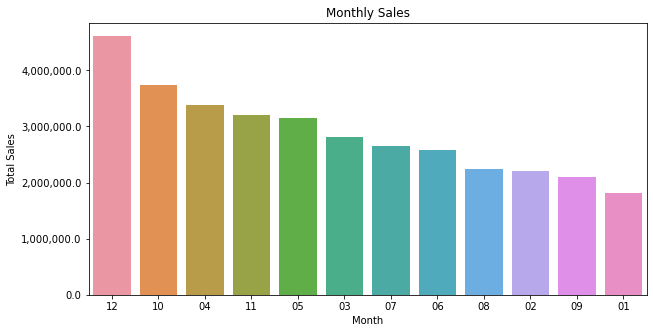

In [13]:
e = all_data.groupby("Month").sum("Sales")
# sns.set(y_fmt = 'd')
plt.figure(figsize=(10,5))
sns.barplot(x=e.index,y=e["Sales"], order = all_data.groupby("Month").sum()["Sales"].sort_values(ascending = False).index)
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:,}'.format(x))
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales")
plt.show()

In [14]:
e.sort_values(by="Sales", ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
04,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
05,18667,3135125.13,3152606.75
03,17005,2791207.83,2807100.38
07,16072,2632539.56,2647775.76
06,15253,2562025.61,2577802.26
08,13448,2230345.42,2244467.88


# Task2
## Which city had the highest sales

Creat a column for city and extract city from address

Define a function to extract City from Purchase Address

In [15]:
def get_city(Address):
    x = Address.split(",")
    y= x[1]
    return y

In [16]:
all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles


Creat a Function to extract state from Address and add it to the City column

In [17]:
def get_state(Address):
    a = Address.split(",")[-1]
    b = a.split(" ")[1]
    return b

In [18]:
all_data["City"] = all_data["City"] + " "  + all_data["Purchase Address"].apply(lambda x: get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [19]:
all_data["City"]

0                 Dallas TX
2                 Boston MA
3            Los Angeles CA
4            Los Angeles CA
5            Los Angeles CA
                ...        
186845       Los Angeles CA
186846     San Francisco CA
186847     San Francisco CA
186848     San Francisco CA
186849     San Francisco CA
Name: City, Length: 185950, dtype: object

In [20]:
city_performance = all_data.groupby("City").sum("Sales").sort_values(by="Sales", ascending= False)
city_performance

,Quantity Ordered,Price Each,Sales
City,,,
San Francisco CA,50239,8211461.74,8262203.91
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Boston MA,22528,3637409.77,3661642.01
Atlanta GA,16602,2779908.20,2795498.58
Dallas TX,16730,2752627.82,2767975.40
Seattle WA,16553,2733296.01,2747755.48
Portland OR,11303,1860558.22,1870732.34
Austin TX,11153,1809873.61,1819581.75


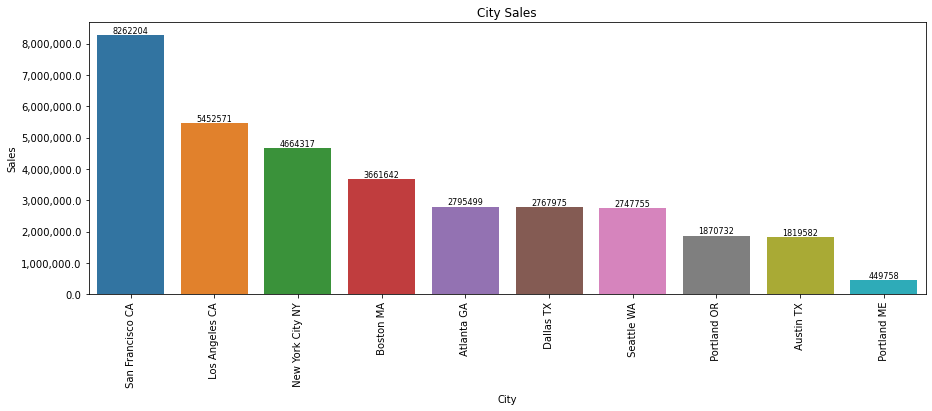

In [21]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y=city_performance["Sales"], x=city_performance.index)
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:,}'.format(x))
plt.xticks(rotation='vertical', size=10)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("City Sales")
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=8, color='black')
plt.show()

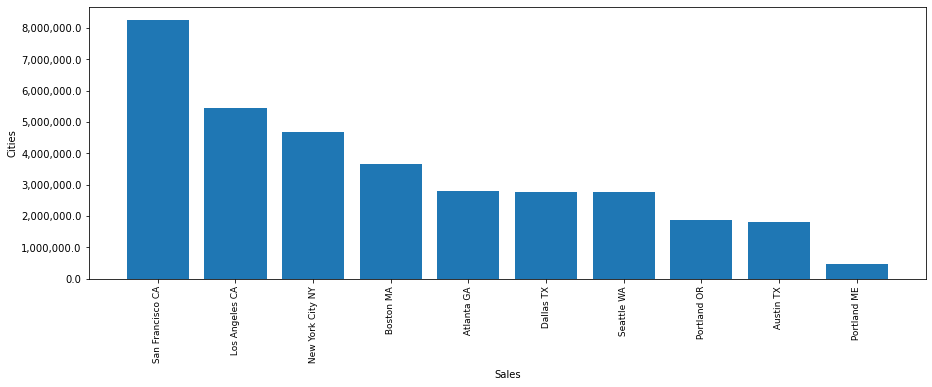

In [22]:
cites = city_performance.index
plt.figure(figsize=(15,5))
plt.bar(cites, city_performance["Sales"])
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:,}'.format(x))
plt.xticks(cites, rotation = 'vertical', size = 9)
plt.xlabel("Sales")
plt.ylabel("Cities")
plt.show()

# Task3
# What time should  we display advertisment to maximize likelihood of customer's buying product?

## Method1
### Using the .string.split method

Define a function to extract Time from the Order Date column and creat a new column for Time

In [23]:
def get_time(date):
    a = date.split(" ")[-1]
    return a

In [24]:
all_data["Time"] = all_data["Order Date"].apply(lambda x: get_time(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,09:27


In [25]:
time_performance = all_data.groupby("Time").sum("Sales").sort_values(by="Sales", ascending= False).head(10)
time_performance

,Quantity Ordered,Price Each,Sales
Time,,,
19:01,269,54358.35,54503.14
12:21,270,53717.10,54181.96
19:16,239,53902.99,54156.39
20:13,269,52846.58,53149.51
19:20,281,52691.86,52903.41
19:21,259,52193.69,52555.99
20:35,270,52034.89,52236.86
19:15,260,50643.14,50717.03
19:47,261,50366.89,50640.71


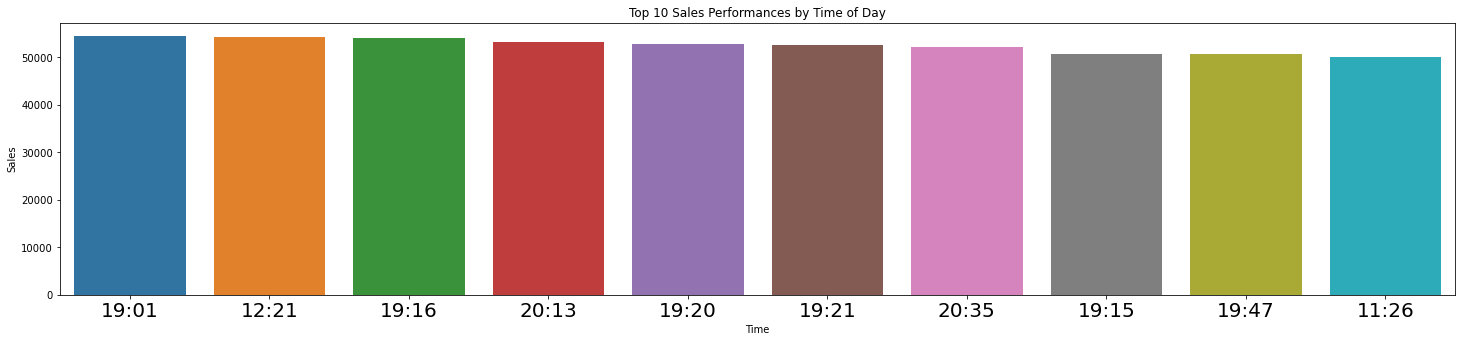

In [26]:
plt.figure(figsize=(25,5))
sns.barplot(x=time_performance.index, y= time_performance["Sales"])
plt.xticks(size=20)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Top 10 Sales Performances by Time of Day")
plt.show()

## Method 2
### Using the DateTime function

In [27]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [28]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22:30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,09:27


In [29]:
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,08:46,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22:30,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,09:27,9,27


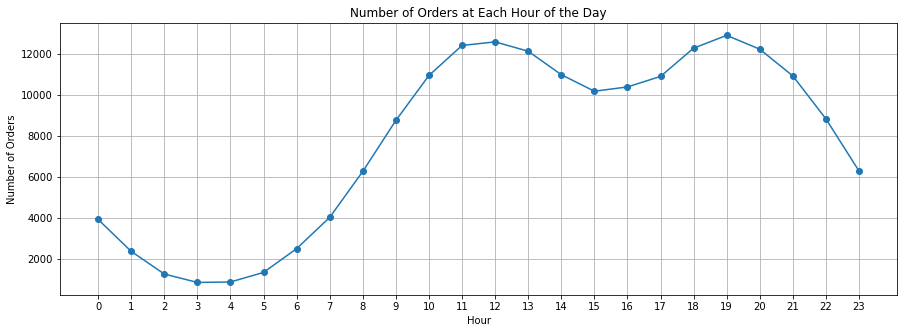

In [30]:
plt.figure(figsize=(15,5))
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby("Hour").count()["Sales"], marker='o', linestyle='-')
plt.grid(True)
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of Orders")
plt.title("Number of Orders at Each Hour of the Day")
plt.show()

# Task3
# What product are most often sold together

In [31]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,08:46,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22:30,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,09:27,9,27


Creat a Dataframe for rows with duplicate Order ID

In [32]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,19:42,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles CA,19:42,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston MA,11:31,11,31


In [33]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14:38,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14:38,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,19:42,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles CA,19:42,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston MA,11:31,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [34]:
df = df[["Order ID","Grouped"]].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [35]:
from itertools import combinations
from collections import Counter
count = Counter()
for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

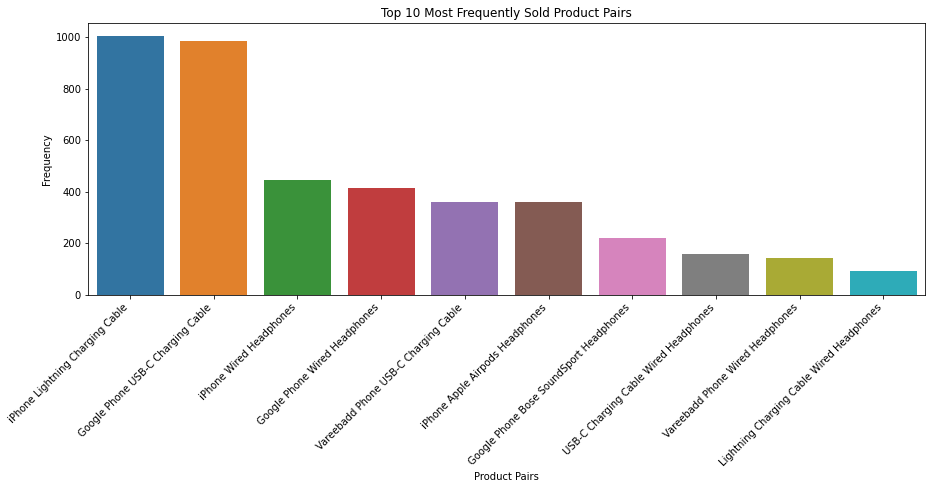

In [36]:
plt.figure(figsize=(15,5))
sns.barplot([pair[0] + ' ' + pair[1] for pair, count in count.most_common(10)], [count for pair, count in count.most_common(10)])
plt.xlabel("Product Pairs")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequently Sold Product Pairs")
plt.xticks(rotation=45, ha="right")
plt.show()

# What product sold the most and why

In [37]:
product_group = all_data.groupby("Product")
Quantity_ordered = product_group.sum()["Quantity Ordered"]
sort = product_group.sum()["Quantity Ordered"].sort_values(ascending=False).index
product = [product for product, df in product_group]

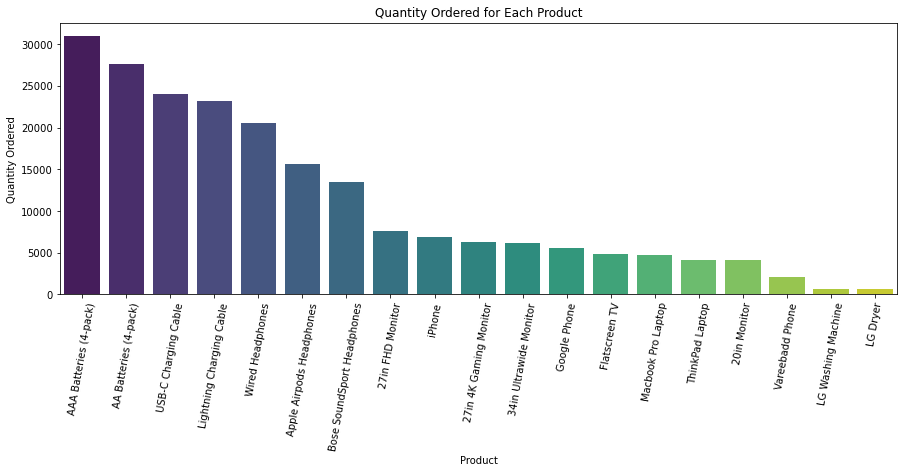

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(product, Quantity_ordered, palette='viridis',order=sort)
plt.xticks(rotation=80)
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered for Each Product")
plt.show()

In [39]:
prices = all_data.groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

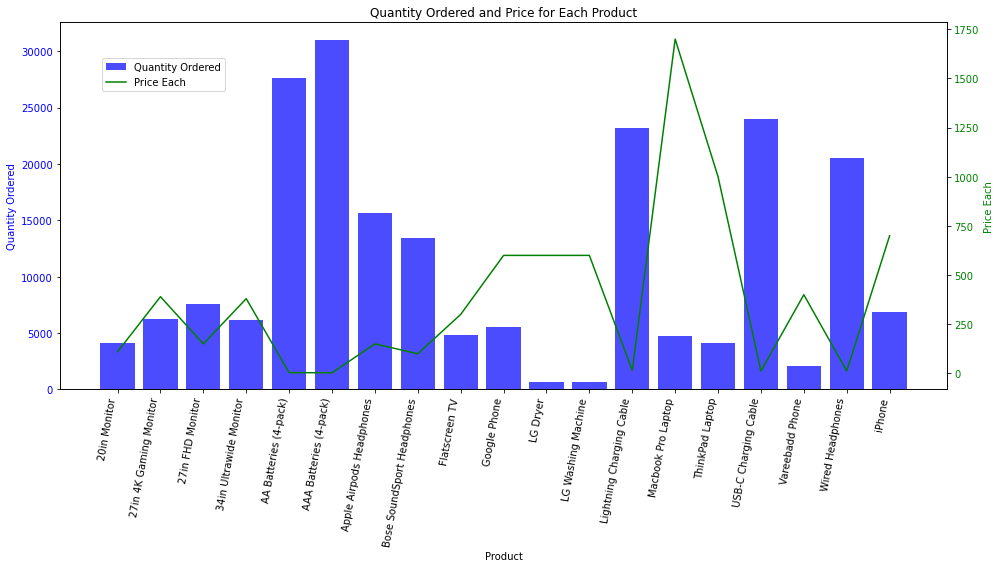

In [40]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Quantity Ordered
ax1.bar(product, Quantity_ordered, color='blue', alpha=0.7, label='Quantity Ordered')
ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color='blue')
ax1.set_xticklabels(product, rotation=80, ha="right")
ax1.tick_params(axis='y', labelcolor='blue')

# Line plot for Prices
ax2 = ax1.twinx()
ax2.plot(product, prices, color='green', label='Price Each')
ax2.set_ylabel("Price Each", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and legend
plt.title("Quantity Ordered and Price for Each Product")
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()